# Análise Multivariada e Aprendizado Não-Supervisionado

por Cibele Russo.

ICMC USP São Carlos.

## Aula 9b: Análise de Correlações Canônicas - Aplicação em Python

**Referências**

- https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_compare_cross_decomposition.html#sphx-glr-auto-examples-cross-decomposition-plot-compare-cross-decomposition-py
- https://cran.r-project.org/web/packages/CCA/CCA.pdf (em R)

**Exemplo:** O conjunto de dados disponível em


https://stats.idre.ucla.edu/stat/data/mmreg.csv


contém observações de oito variáveis em 600 indivíduos. As variáveis de natureza psicológica são *locus of control*, *self-concept* and *motivation*. Foram coletadas também variáveis acadêmicas padronizadas de testes de *reading*, *writing*, *math* e *science*. Adicionalmente, a variável *female* é uma variável indicadora que assume 1 para estudante do sexo feminino e 0 para estudante do sexo masculino. O objetivo principal do pesquisador é avaliar quantas dimensões são necessárias para entender a associação entre os dois conjuntos de variáveis (psicológicas e acadêmicas).

a. Desenvolva uma análise exploratória dos dados em questão.

b. Realize uma análise de correlações canônicas.

(em R, os comandos estão disponíveis em
https://stats.idre.ucla.edu/r/dae/canonical-correlation-analysis/ )



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA


In [2]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/mmreg.csv")
df.head()

,locus_of_control,self_concept,motivation,read,write,math,science,female
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6,1
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6,1
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0,0
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0,0
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3,1


In [3]:
df.shape

(600, 8)

In [4]:
X = df.iloc[:,0:3]
Y = df.iloc[:,3:8]

In [5]:
X.head()

,locus_of_control,self_concept,motivation
0,-0.84,-0.24,1.00
1,-0.38,-0.47,0.67
2,0.89,0.59,0.67
3,0.71,0.28,0.67
4,-0.64,0.03,1.00


In [6]:
Y.head()

,read,write,math,science,female
0,54.8,64.5,44.5,52.6,1
1,62.7,43.7,44.7,52.6,1
2,60.6,56.7,70.5,58.0,0
3,62.7,56.7,54.7,58.0,0
4,41.6,46.3,38.4,36.3,1


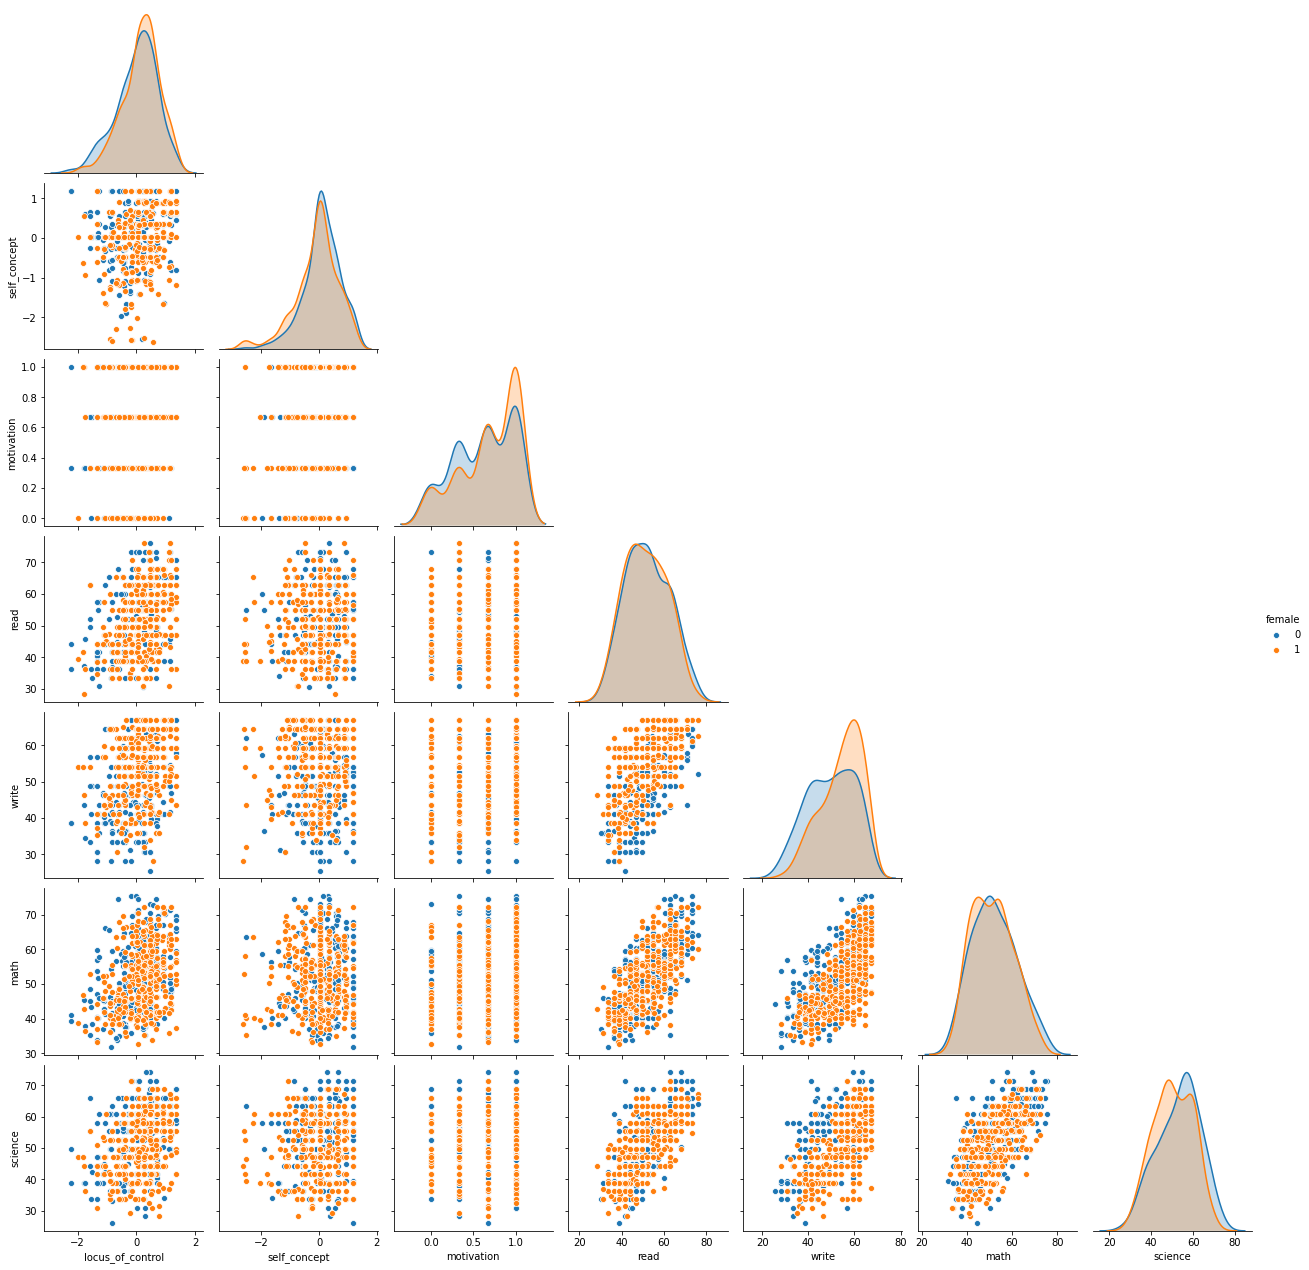

In [7]:
# Seaborn visualization library
import seaborn as sns# Create the default pairplot
sns.pairplot(df, hue='female', corner=True)

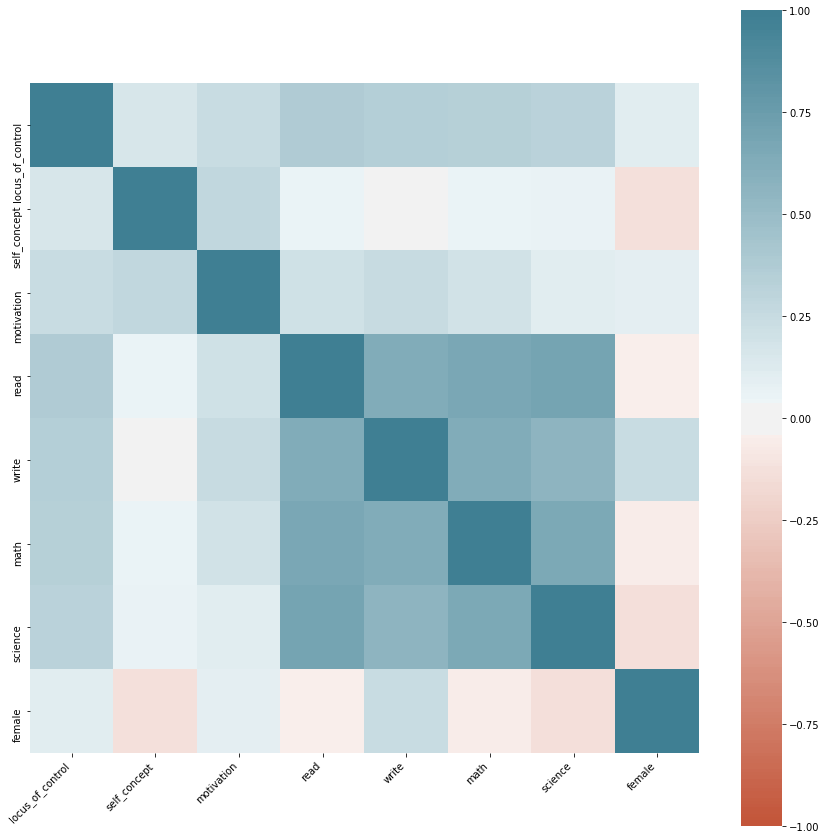

In [8]:
corr = df.corr()
ax = plt.subplots(figsize=(15, 15)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
X.shape

(600, 3)

In [10]:
Y.shape

(600, 5)

In [11]:
cca = CCA(n_components=3)

cca.fit(X, Y)


CCA(n_components=3)

In [12]:
cca.x_loadings_

array([[ 0.88345951,  0.4496546 , -0.16885294],
       [ 0.02039914,  0.81823427,  0.67733444],
       [ 0.55421035, -0.40475425,  0.71603543]])

U1 = 0.883 X1 + 0.02 X2 + 0.554 X3

In [13]:
cca.y_loadings_

array([[ 0.57937624,  0.35979895,  0.20386251],
       [ 0.60425404, -0.0649778 ,  0.38358287],
       [ 0.52663967,  0.29876267,  0.2225597 ],
       [ 0.45389249,  0.67855932, -0.34727975],
       [ 0.25099684, -0.75705822, -0.81857614]])

V1 = 0.579 Y1 + 0.604 Y2 + 0.527 Y3 + 0.454 Y4 + 0.251 Y5

In [14]:
cca.x_rotations_

array([[ 0.86003872,  0.36077925, -0.46173054],
       [-0.25362468,  0.72616836,  0.60678722],
       [ 0.44272781, -0.60184201,  0.71370428]])

In [15]:
cca.y_rotations_

array([[ 0.65394154,  0.04950559,  0.14335184],
       [ 0.5061941 , -0.40795497,  0.58945352],
       [ 0.31981197, -0.03970026,  0.05872736],
       [ 0.07077307,  0.82419288, -0.70762561],
       [ 0.45698957, -0.53929422, -0.5935395 ]])

In [16]:
X_c, Y_c = cca.transform(X, Y)

Y_c.shape

(600, 3)

In [17]:
df[['U1', 'U2', 'U3']] = X_c
df[['V1', 'V2', 'V3']] = Y_c

In [18]:
df

,locus_of_control,self_concept,motivation,read,write,math,science,female,U1,U2,U3,V1,V2,V3
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6,1,-0.675499,-1.351764,1.140783,0.991768,-0.884255,0.126631
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6,1,-0.428873,-0.761413,-0.061105,0.427415,0.026023,-1.020573
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0,0,0.819610,1.013201,-0.024290,0.966890,0.902299,0.695644
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0,0,0.700093,0.597240,-0.166915,0.566103,0.979215,0.626883
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3,1,-0.515940,-0.966208,1.235229,-1.135884,-1.543957,-0.013346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.94,-0.30,1.00,60.1,67.1,52.4,55.3,1,1.629995,-0.455432,-0.136996,1.758181,-0.771381,0.211837
596,0.23,0.03,1.00,65.4,56.7,65.4,58.0,1,0.600360,-0.497929,0.635918,2.021278,-0.134755,-0.458984
597,0.46,0.03,1.00,65.4,51.5,61.4,60.7,1,0.895474,-0.374132,0.477480,1.634464,0.329484,-0.995914
598,0.51,0.03,1.00,54.8,54.1,66.4,41.7,1,0.959629,-0.347219,0.443037,1.114971,-1.465964,0.427627


In [19]:
np.corrcoef(df['U1'],df['V1'])

array([[1.        , 0.46408608],
       [0.46408608, 1.        ]])

In [20]:
np.corrcoef(df['U2'],df['V2'])

array([[1.        , 0.16750915],
       [0.16750915, 1.        ]])

In [21]:
np.corrcoef(df['U3'],df['V3'])

array([[1.        , 0.10399115],
       [0.10399115, 1.        ]])

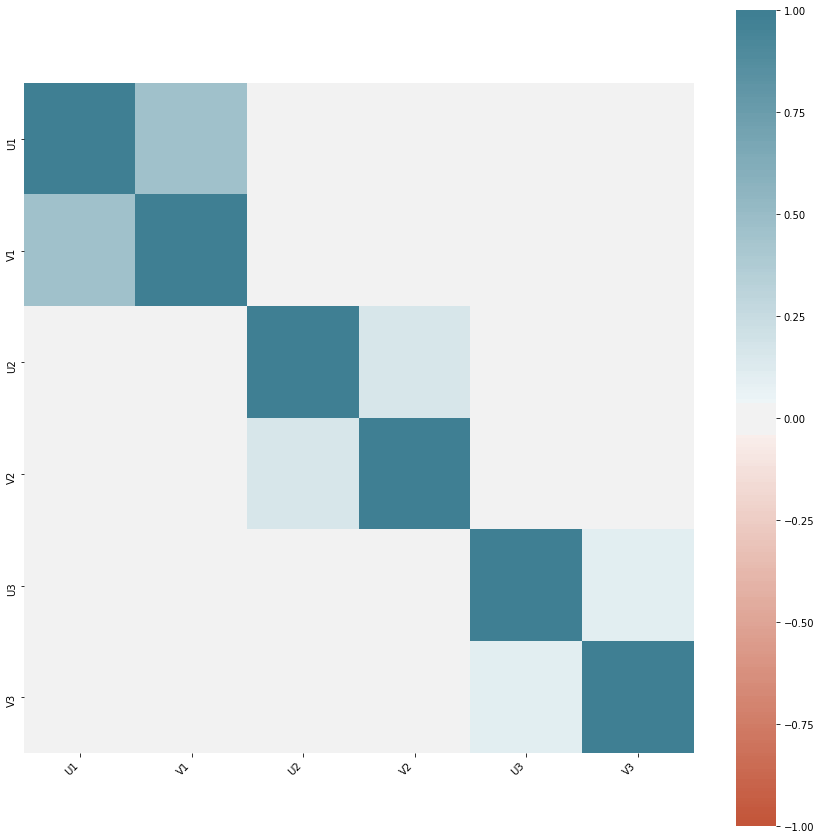

In [22]:
corr = df[['U1','V1','U2','V2','U3','V3']].corr()
ax = plt.subplots(figsize=(15, 15)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);